In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import datetime
# Get paths to data and results directories
from paths import *

from src.generate_data2 import pseudoVoigtSimulator

c:\Users\andre\OneDrive - Danmarks Tekniske Universitet\Bachelorprojekt\Code\bachelor-project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def save_to_file(filename, data):
    now_string_pretty = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    # save spectra to npy file
    np.save(f'{data_dir}/{filename}.npy', data)

    print(f"Data saved on {now_string_pretty} to ./data/{filename}.npy")

def plot_spectra(random_spectra, n=5):
        
    # plot 5 random spectra
    n = 5
    for i in range(n):
        plt.plot(random_spectra[i])

    # axis names 
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity (a.u.)')
    plt.title(f'{n} random raman spectra generated')
    plt.show()



In [3]:
n_train = 1000
train_test_split = 0.8
n_test = int(n_train/train_test_split * (1 - train_test_split))
wavenumnbers = 500
psv = pseudoVoigtSimulator(500)

print(f"Generation of {n_train} training spectra and {n_test} test spectra. Split is {train_test_split}")

Generation of 1000 training spectra and 249 test spectra. Split is 0.8


## Randomized $\alpha$

$c = 250$, $\gamma = 20$, $\eta=0.5$, $\alpha \in [0.5, 10]$

Generating data with 1 peak, 1000 datapoints, 500 wavenumbers
Parametes: peaks = [250], gamma = [20], eta = [0.5], alpha = [0.5, 10]
Data saved on 2023-04-12 11:37:50 to ./data/randomized_alpha_2023-04-12-11-37-50.npy
Data saved on 2023-04-12 11:37:50 to ./data/randomized_alpha_parameters_2023-04-12-11-37-50.npy
Data saved on 2023-04-12 11:37:50 to ./data/randomized_alpha_test_2023-04-12-11-37-50.npy
Data saved on 2023-04-12 11:37:50 to ./data/randomized_alpha_test_parameters_2023-04-12-11-37-50.npy


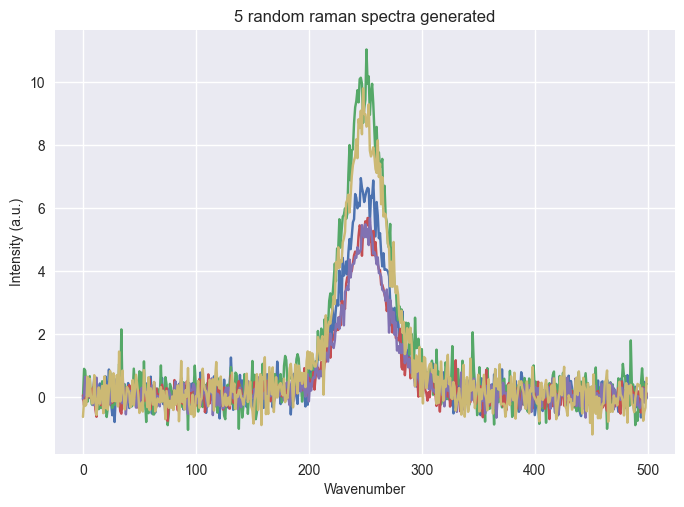

In [4]:
print(f"Generating data with 1 peak, {1000} datapoints, {500} wavenumbers")
print(f"Parametes: peaks = [250], gamma = [20], eta = [0.5], alpha = [0.5, 10]")

for key, amount in {"randomized_alpha": n_train, "randomized_alpha_test": n_test}.items():

    peaks = np.array([250])
    gamma = np.array([20])
    eta = np.array([0.5])
    # Randomize alpha  with shape (amount, len(peaks))
    alpha = np.random.uniform(0.5, 10, (amount, len(peaks)))
    random_spectra = np.zeros((amount, wavenumnbers))
    for i in range(amount):
        ps = psv.generate_full_spectrum(peaks, gamma, eta, alpha[i])
        random_spectra[i] = ps

    c = np.tile(peaks, (amount, 1))
    gammas = np.tile(gamma, (amount, 1))
    etas = np.tile(eta, (amount, 1))

    # Merge all parameters into one array
    parameters = [c, gammas, etas, alpha]
    parameters = np.array(parameters)
    # save to file
    save_to_file(key, random_spectra)
    save_to_file(f'{key}_parameters', parameters)

plot_spectra(random_spectra, 5)

## Randomized $c$

$c \in [50, 450]$, $\gamma = 20$, $\eta=0.5$, $\alpha = 1$

Generating data with 1 peak, 1000 datapoints, 500 wavenumbers
Parametes: peaks = [50, 450], gamma = [20], eta = [0.5], alpha = [1]
Data saved on 2023-04-12 11:38:06 to ./data/randomized_c_2023-04-12-11-38-06.npy
Data saved on 2023-04-12 11:38:06 to ./data/randomized_c_parameters_2023-04-12-11-38-06.npy
Data saved on 2023-04-12 11:38:06 to ./data/randomized_c_test_2023-04-12-11-38-06.npy
Data saved on 2023-04-12 11:38:06 to ./data/randomized_c_test_parameters_2023-04-12-11-38-06.npy


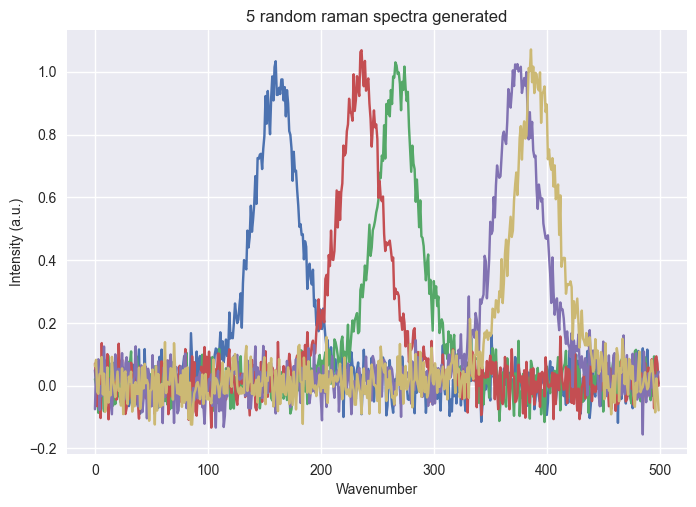

In [5]:
print(f"Generating data with 1 peak, {1000} datapoints, {500} wavenumbers")
print(f"Parametes: peaks = [50, 450], gamma = [20], eta = [0.5], alpha = [1]")

for key, amount in {"randomized_c": n_train, "randomized_c_test": n_test}.items():

    # peaks = np.array([250])
    gamma = np.array([20])
    eta = np.array([0.5])
    alpha = np.array([1])
    # Randomize alpha  with shape (amount, len(peaks))
    peaks = np.random.uniform(50, 450, (amount, len(alpha)))
    random_spectra = np.zeros((amount, wavenumnbers))
    for i in range(amount):
        ps = psv.generate_full_spectrum(peaks[i], gamma, eta, alpha)
        random_spectra[i] = ps

    gammas = np.tile(gamma, (amount, 1))
    etas = np.tile(eta, (amount, 1))
    alphas = np.tile(alpha, (amount, 1))

    # Merge all parameters into one array
    parameters = [peaks, gammas, etas, alphas]
    parameters = np.array(parameters)
    # save to file
    save_to_file(key, random_spectra)
    save_to_file(f'{key}_parameters', parameters)

plot_spectra(random_spectra, 5)